In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Observation- As there are no column names given in the dataset we will use df.columns to rename the columns of th datasets

In [3]:
df.shape

(213, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Observations- As we can see in the df.info() there are no null values in the given data set

In [5]:
df.ndim

2

In [7]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [20]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','TOG']

In [21]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [12]:
df.columns

Index(['Id number', 'RI:refractive index', 'Na:Sodium', 'Mg: Magnesium',
       'Al:Aluminum', 'Si:Silicon', 'K:Potassium', 'Ca:Calcium', 'Ba:Barium',
       'Fe:Iron', 'Type of glass'],
      dtype='object')

In [22]:
df.TOG.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Observation- There are total 7 types of glass

In [23]:
df.TOG.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: TOG, dtype: int64

1-4 are window glass and 6-7 are non window glass

2    76
1    69
7    29
3    17
5    13
6     9
Name: TOG, dtype: int64


<AxesSubplot:xlabel='TOG', ylabel='count'>

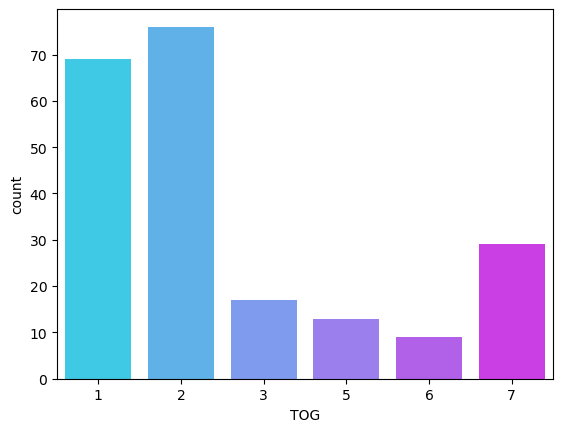

In [24]:
print(df['TOG'].value_counts())
sns.countplot(df['TOG'],palette="cool")

Observation- There are total 7 types of Glass in the given dataset (The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7))

In [25]:
df.dtypes

Id number      int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
TOG            int64
dtype: object

Observation:- As we can see in the result all the values in the dataset are in float expect "Type of Glass(TOG)"

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id number  213 non-null    int64  
 1   RI         213 non-null    float64
 2   Na         213 non-null    float64
 3   Mg         213 non-null    float64
 4   Al         213 non-null    float64
 5   Si         213 non-null    float64
 6   K          213 non-null    float64
 7   Ca         213 non-null    float64
 8   Ba         213 non-null    float64
 9   Fe         213 non-null    float64
 10  TOG        213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [28]:
df.min()

Id number     2.00000
RI            1.51115
Na           10.73000
Mg            0.00000
Al            0.29000
Si           69.81000
K             0.00000
Ca            5.43000
Ba            0.00000
Fe            0.00000
TOG           1.00000
dtype: float64

In [29]:
df.max()

Id number    214.00000
RI             1.53393
Na            17.38000
Mg             3.98000
Al             3.50000
Si            75.41000
K              6.21000
Ca            16.19000
Ba             3.15000
Fe             0.51000
TOG            7.00000
dtype: float64

In [30]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observation- 1)Standard deviation of none column is high hence the data is not spreaded and there is  less possibilities of outliers.

2)mean is almost equalt to median so there is less skewness in data.

3)There is a bit difference in the 75% and max_value hence there is high possibility of outliers in the dataset.

In [31]:
df.isnull().sum()

Id number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
TOG          0
dtype: int64

Observation- As we can see in description there are no null values in the data set, still we will check it with the heatmap

<AxesSubplot:>

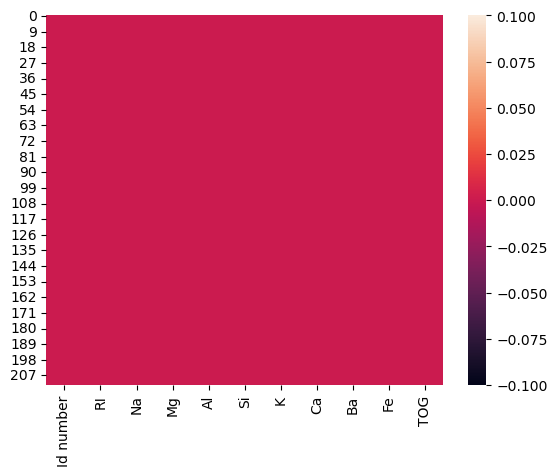

In [32]:
sns.heatmap(df.isnull())

In [33]:
dfcor=df.corr()
dfcor

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
Id number,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,0.451437,-0.078151,0.878113
RI,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.451437,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090


<AxesSubplot:>

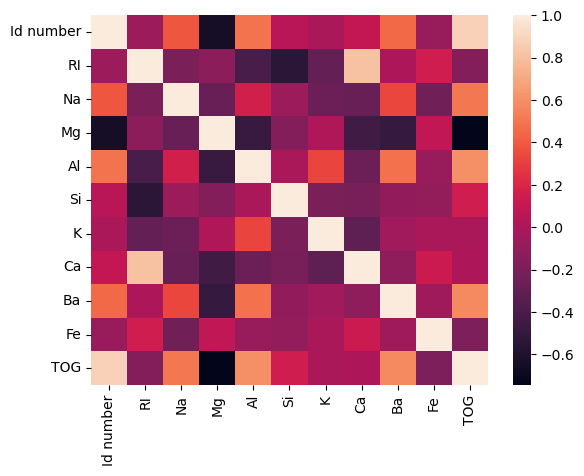

In [53]:
sns.heatmap(dfcor)

Observation- We can drop negatively correleated values but in this data set it make no sense to remove these values as it will impact our end result

checking the correlation with the help of graphical representation

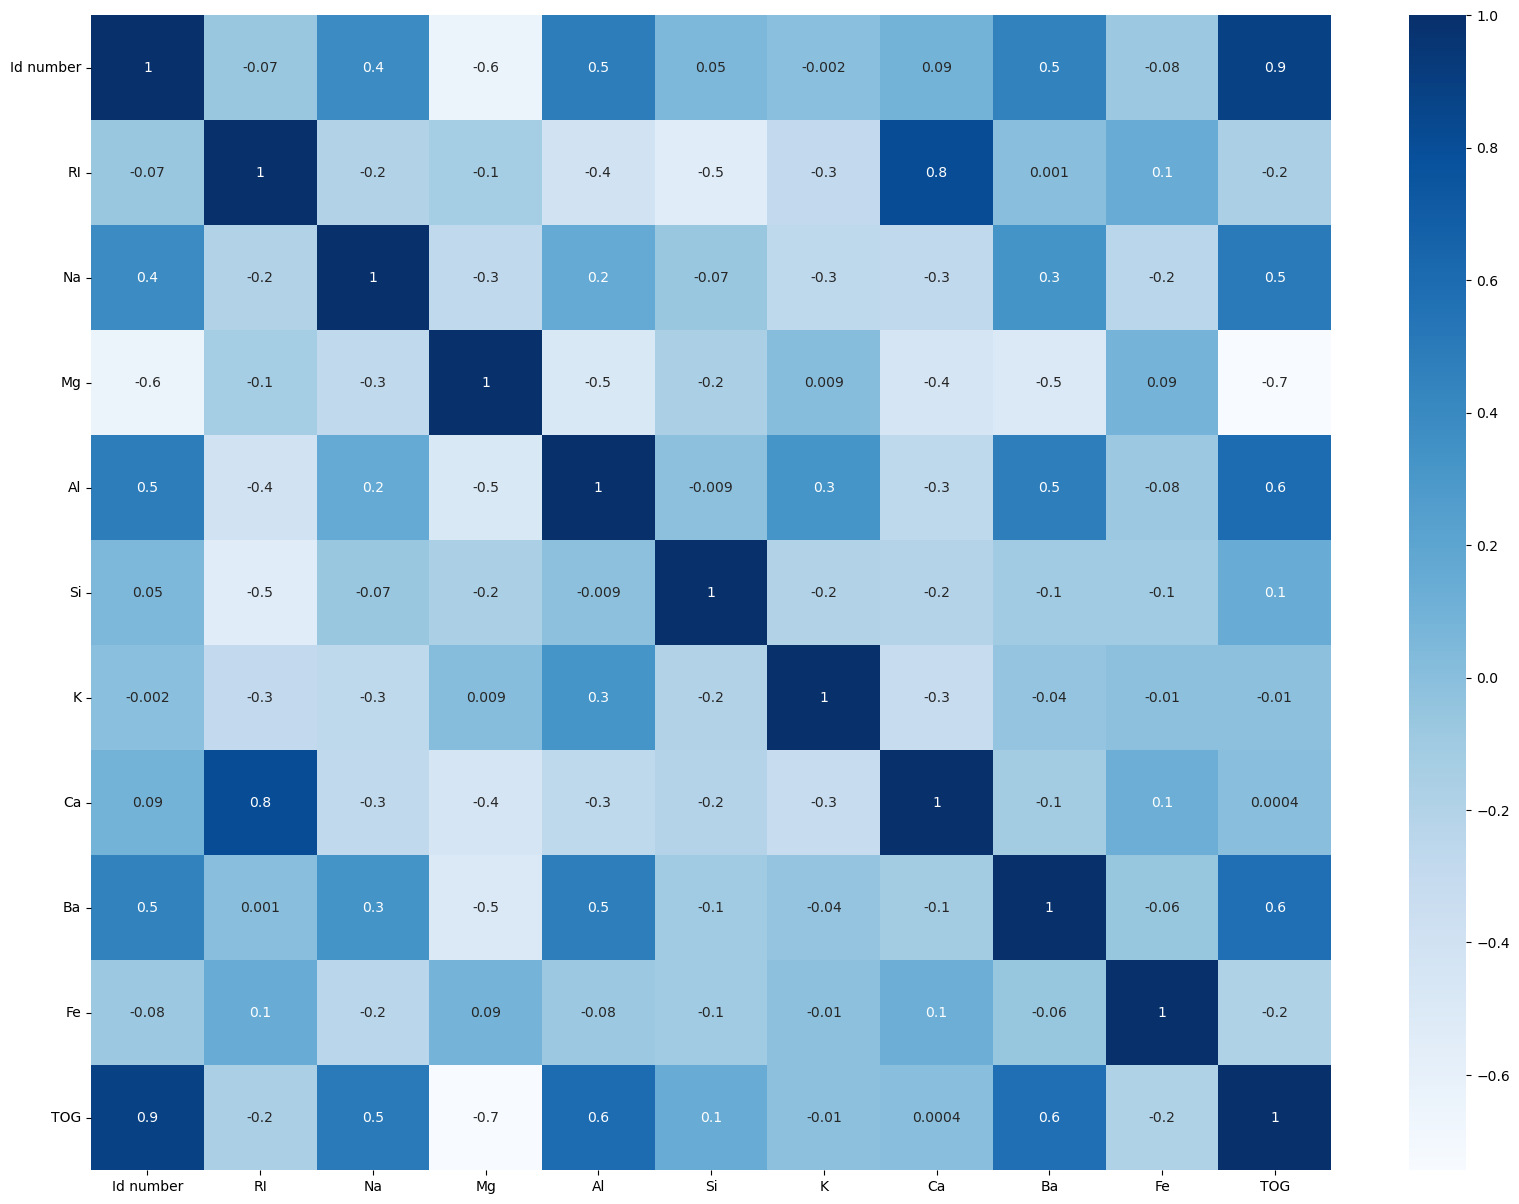

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',fmt=".1g",annot=True)
plt.yticks(rotation=0);
plt.show()

Observation-  As we can see from this graphical representation "Ba","Al","Na" and "Si" is related with type of glass

Plotting the outliers

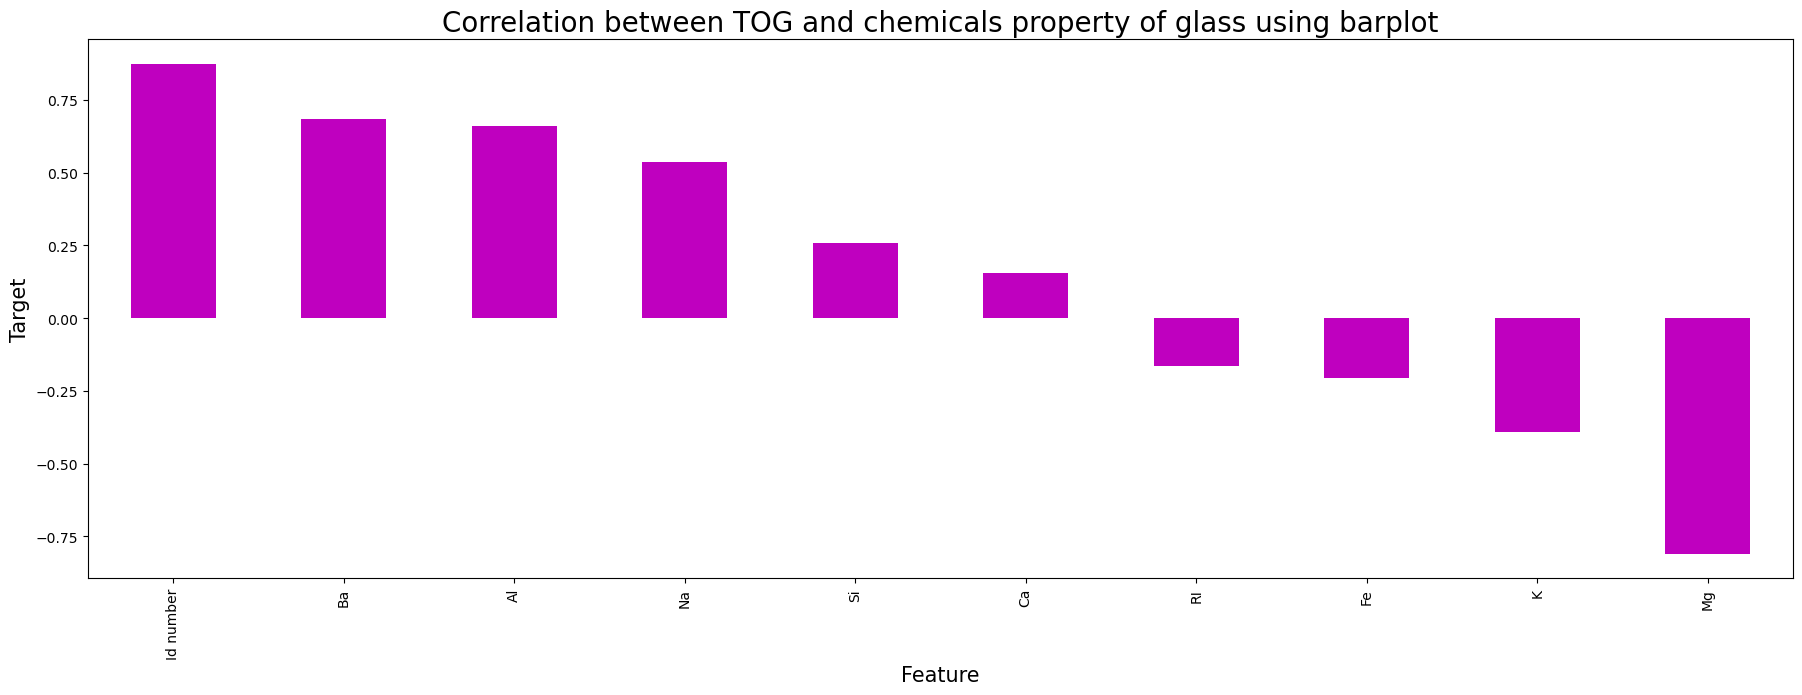

In [56]:
plt.figure(figsize=(22,7))
df.corr()['TOG'].sort_values(ascending = False).drop(['TOG']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between TOG and chemicals property of glass using barplot",fontsize=20)
plt.show()

Observation - This Bar graph clearly shows the correlation between tog and chemical property of glass. "Ba","Al","Na" are highly correleated

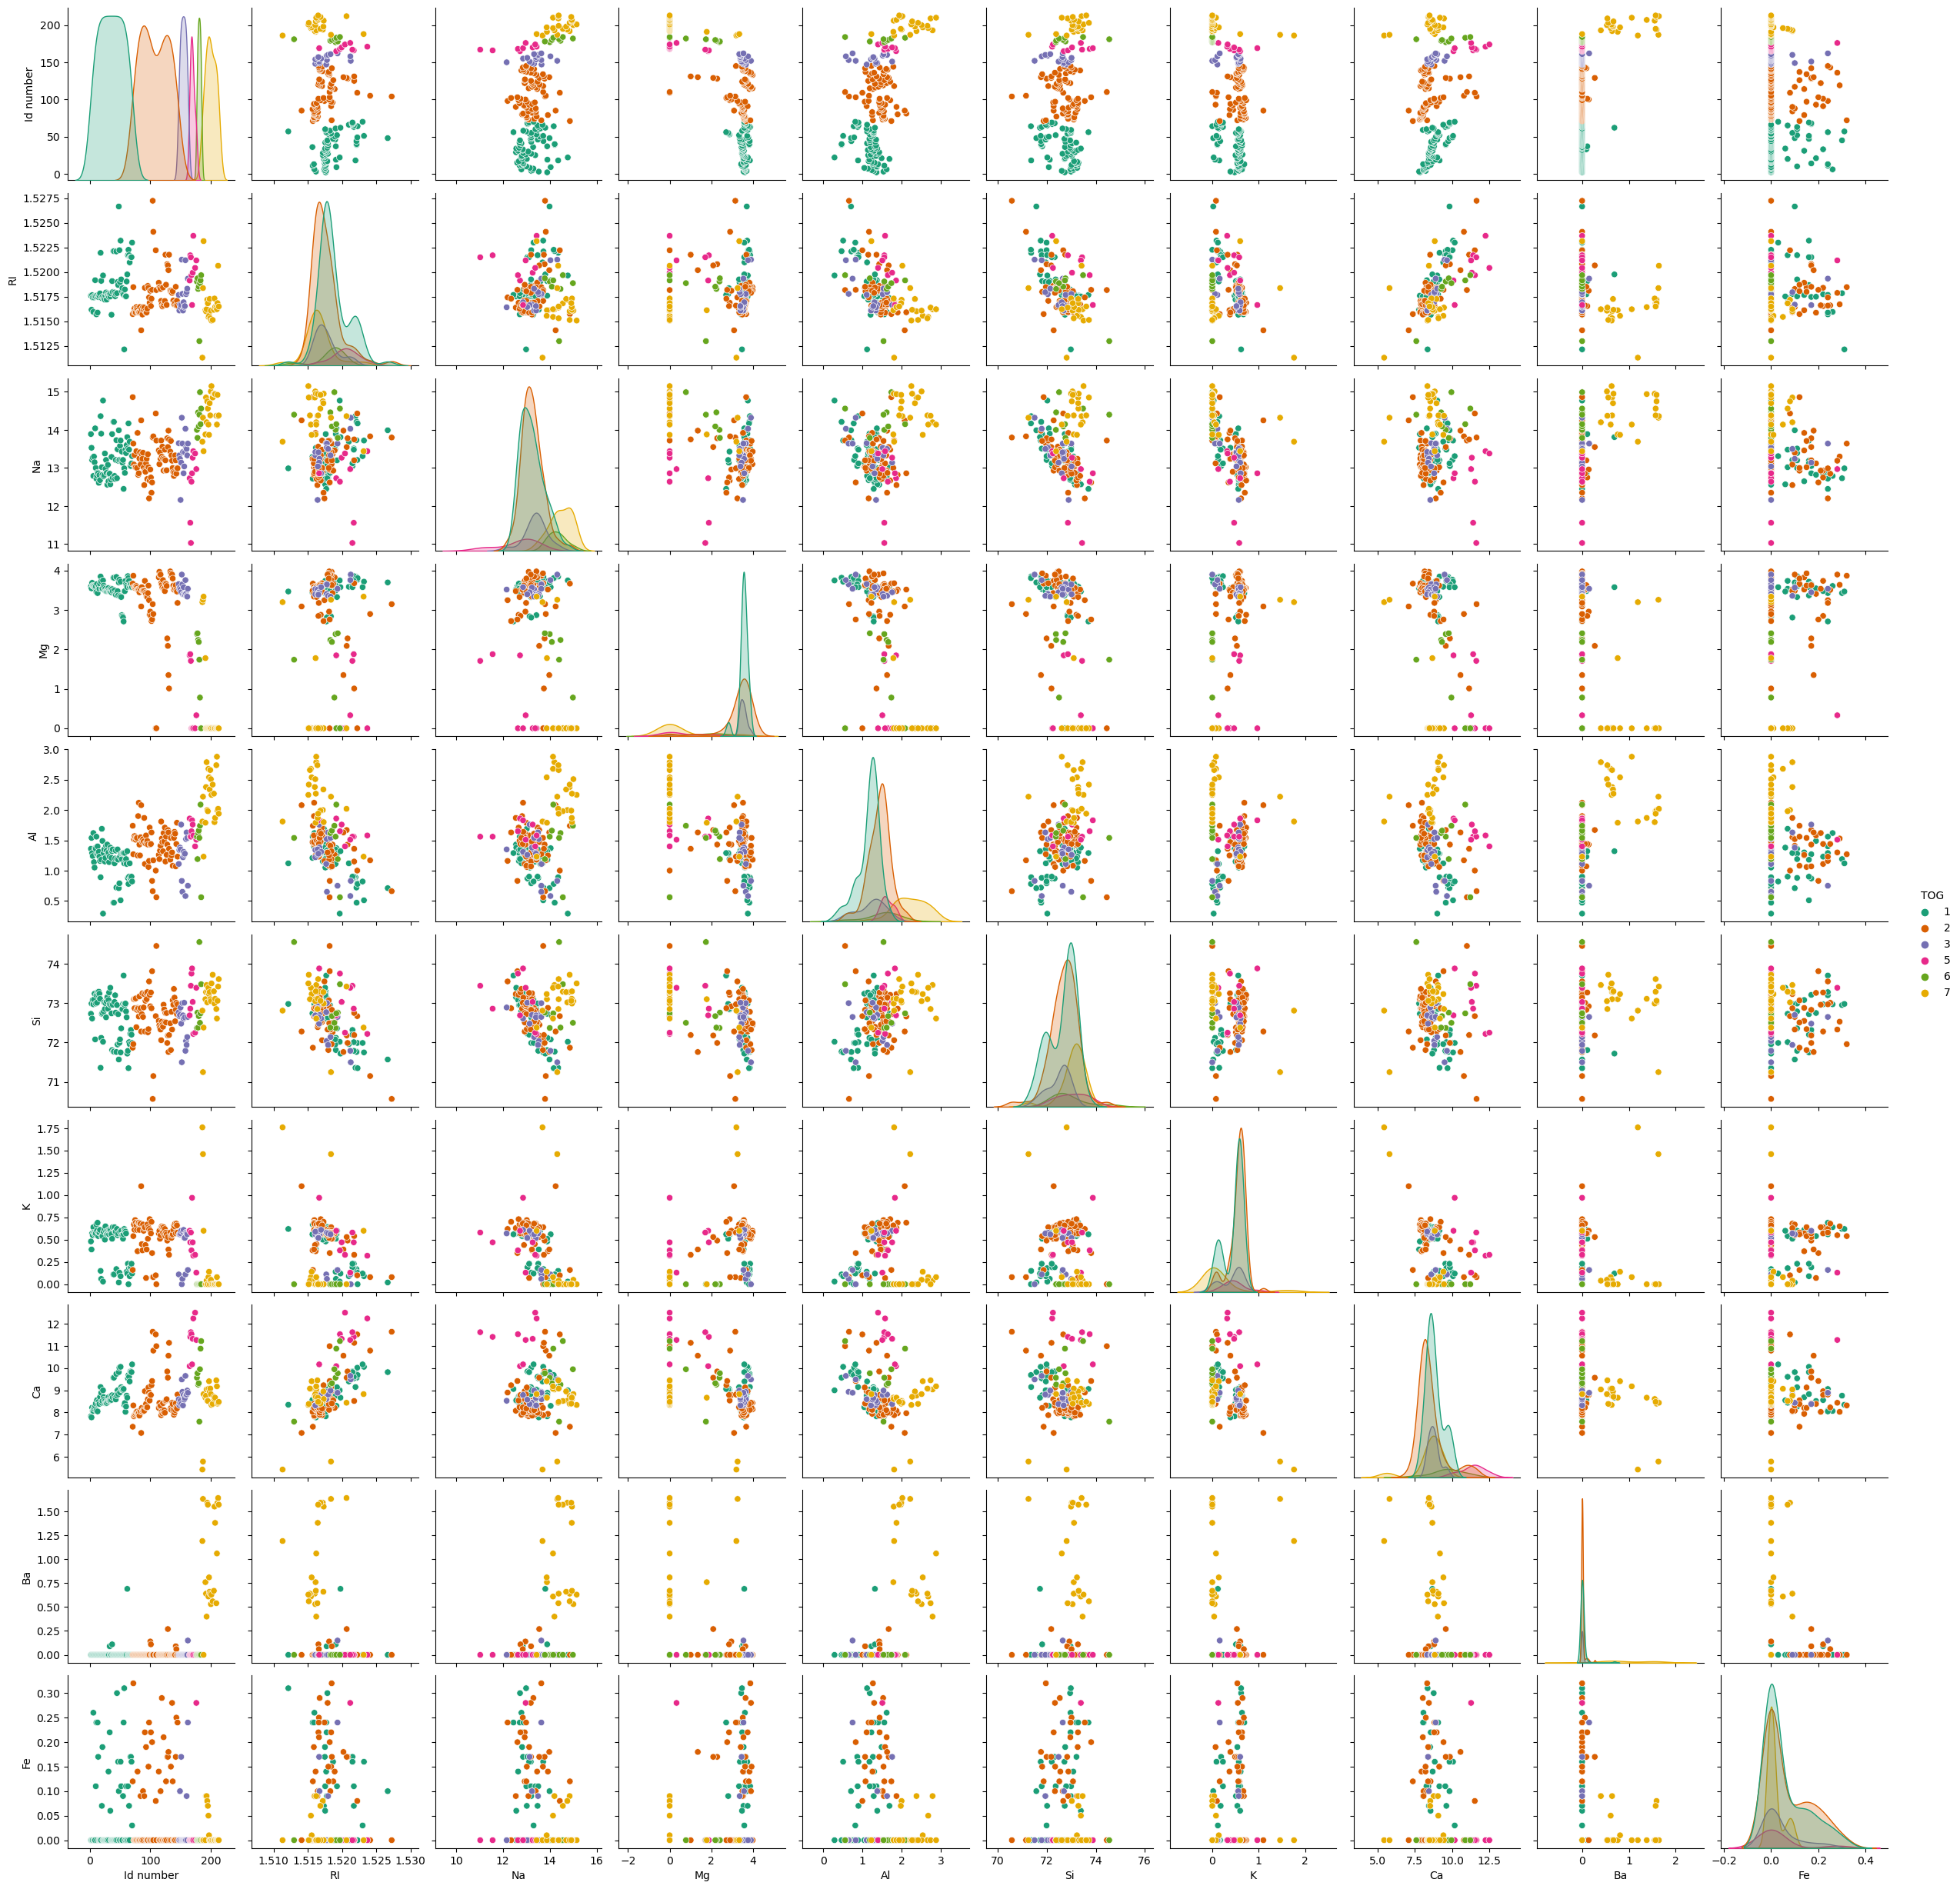

In [57]:
sns.pairplot(df,hue="TOG", palette= "Dark2")
plt.show()

Observation - As mentioned above there is little bit of skewness in some columns and using pairplot we can also establish some kind of relation between the columns

In [35]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'TOG'],
      dtype='object')

Id number       AxesSubplot(0.125,0.53;0.110714x0.35)
RI           AxesSubplot(0.257857,0.53;0.110714x0.35)
Na           AxesSubplot(0.390714,0.53;0.110714x0.35)
Mg           AxesSubplot(0.523571,0.53;0.110714x0.35)
Al           AxesSubplot(0.656429,0.53;0.110714x0.35)
Si           AxesSubplot(0.789286,0.53;0.110714x0.35)
K               AxesSubplot(0.125,0.11;0.110714x0.35)
Ca           AxesSubplot(0.257857,0.11;0.110714x0.35)
Ba           AxesSubplot(0.390714,0.11;0.110714x0.35)
Fe           AxesSubplot(0.523571,0.11;0.110714x0.35)
TOG          AxesSubplot(0.656429,0.11;0.110714x0.35)
dtype: object

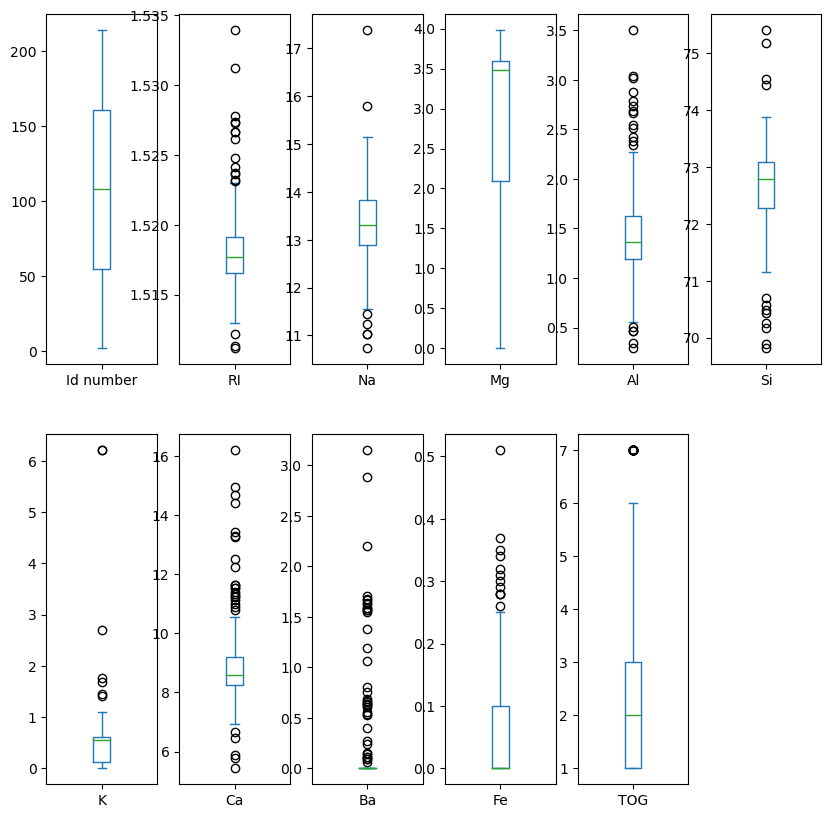

In [36]:
df.plot(kind='box',subplots=True,layout =(2,6),figsize=(10,10))

Observation- "Ri","Na","al","Ca","ba","Fe","k","Si" almost all the columns have outliers present 

In [38]:
from scipy.stats import zscore
out_features=df[['RI','Na','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(out_features))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.245101,0.591880,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


Observation- As we can see that the column number is reduced to 8 from 11 

In [39]:
threshold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
       4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))


In [40]:
df_new=df[(z<3).all(axis=1)]
df_new

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [41]:
df=df_new
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


Observation- Outliers are removed successfully, we can see that the count of rows come down to 193

# Now, Checking for Skewness

<AxesSubplot:xlabel='RI', ylabel='Density'>

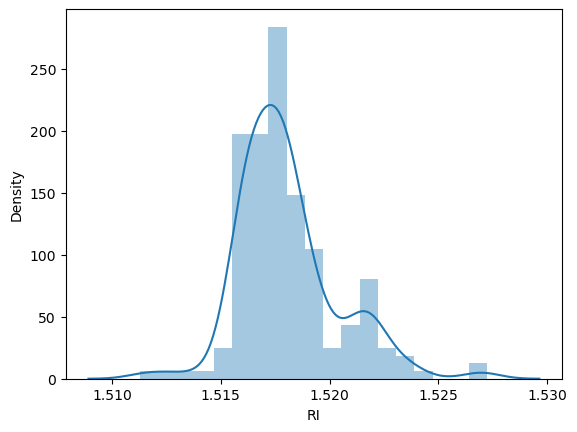

In [42]:
sns.distplot(df['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

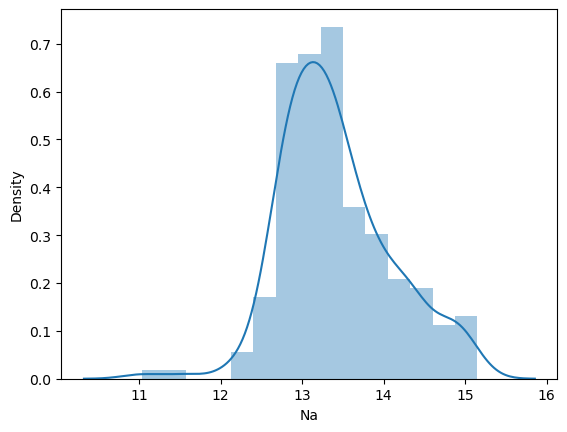

In [43]:
sns.distplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

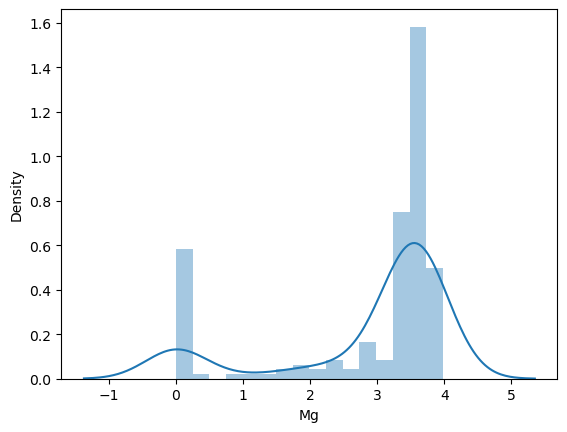

In [44]:
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

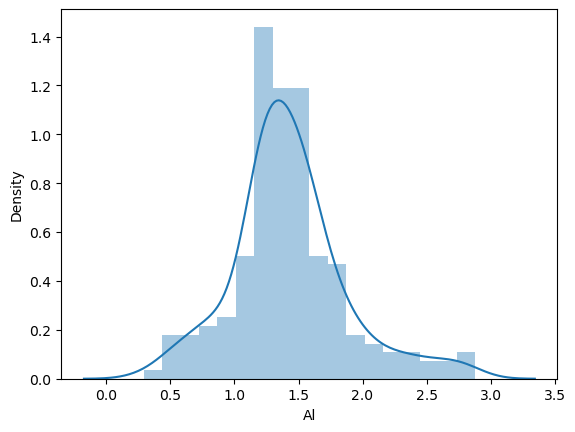

In [45]:
sns.distplot(df['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

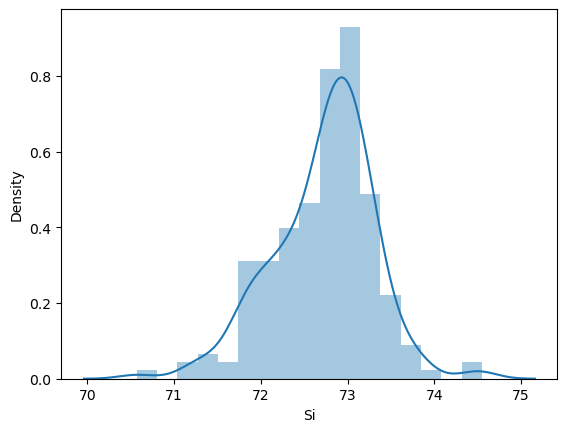

In [46]:
sns.distplot(df['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

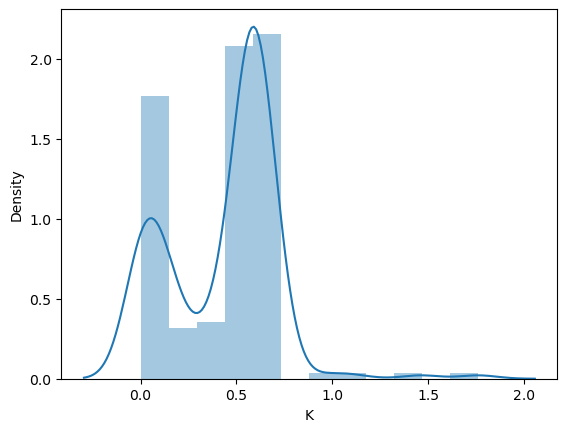

In [47]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

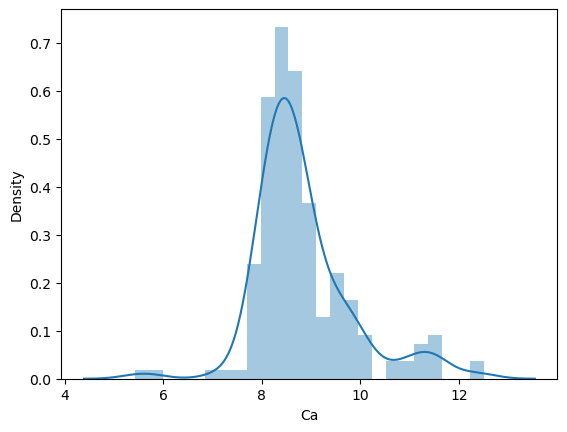

In [48]:
sns.distplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

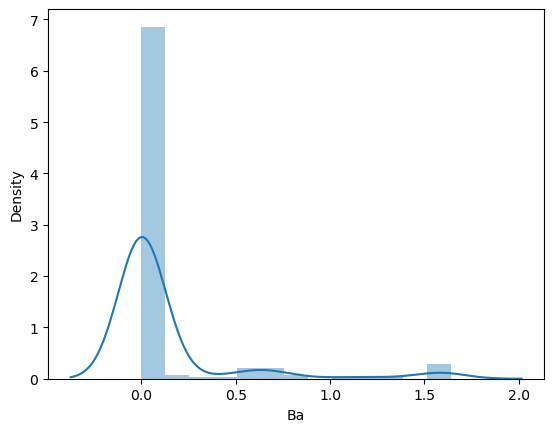

In [49]:
sns.distplot(df['Ba'])

Observation - A bit of Skewness is present in "Ba","K","Mg"

In [58]:
df.skew()

Id number    0.107364
RI           0.971729
Na           0.375857
Mg          -1.533664
Al           0.649917
Si          -0.436288
K            0.297900
Ca           1.074092
Ba           3.178256
Fe           1.478611
TOG          1.277279
dtype: float64

Observation - The data for skewness must fall under -0.5 to +0.5 if not the data is having skewness and will have to remove the skewness with the help of 'crbt' library. Here in the given dataset we can find the skewness in "Mg","Ca","Ba","Fe"

In [63]:
df['Mg']=np.cbrt(df['Mg'])

In [64]:
df['Ca']=np.cbrt(df['Ca'])

In [65]:
df['Ba']=np.cbrt(df['Ba'])

In [66]:
df['Fe']=np.cbrt(df['Fe'])

In [67]:
df.skew()

Id number    0.107364
RI           0.971729
Na           0.375857
Mg                NaN
Al           0.649917
Si          -0.436288
K            0.297900
Ca           0.609725
Ba           2.198820
Fe           0.875093
TOG          1.277279
dtype: float64

In [70]:
df.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
Id number,1.000000,-0.090664,0.418081,-0.232281,0.528945,0.138584,-0.315942,0.178829,0.539486,-0.101953,0.873287
RI,-0.090664,1.000000,0.048762,-0.116940,-0.520285,-0.604910,-0.362609,0.693877,-0.224310,0.020867,-0.162981
Na,0.418081,0.048762,1.000000,-0.139445,0.254805,-0.233588,-0.612858,0.018073,0.548616,-0.159948,0.535440
Mg,-0.232281,-0.116940,-0.139445,1.000000,-0.133183,-0.065398,0.201720,-0.299727,0.015650,-0.055946,-0.320335
Al,0.528945,-0.520285,0.254805,-0.133183,1.000000,0.331868,0.000847,-0.222600,0.598833,-0.086766,0.659242
Si,0.138584,-0.604910,-0.233588,-0.065398,0.331868,1.000000,0.062254,-0.161570,0.181136,-0.003246,0.257640
K,-0.315942,-0.362609,-0.612858,0.201720,0.000847,0.062254,1.000000,-0.529334,-0.298576,0.047945,-0.391378
Ca,0.178829,0.693877,0.018073,-0.299727,-0.222600,-0.161570,-0.529334,1.000000,-0.148647,0.013004,0.136329
Ba,0.539486,-0.224310,0.548616,0.015650,0.598833,0.181136,-0.298576,-0.148647,1.000000,-0.036261,0.700780
Fe,-0.101953,0.020867,-0.159948,-0.055946,-0.086766,-0.003246,0.047945,0.013004,-0.036261,1.000000,-0.185437


In [71]:
df= df.drop(columns=['Mg'])

In [72]:
df

,Id number,RI,Na,Al,Si,K,Ca,Ba,Fe,TOG
0,2,1.51761,13.89,1.36,72.73,0.48,1.985732,0.000000,0.00000,1
1,3,1.51618,13.53,1.54,72.99,0.39,1.981496,0.000000,0.00000,1
2,4,1.51766,13.21,1.29,72.61,0.57,2.018168,0.000000,0.00000,1
3,5,1.51742,13.27,1.24,73.08,0.55,2.005816,0.000000,0.00000,1
4,6,1.51596,12.79,1.62,72.97,0.64,2.005816,0.000000,0.63825,1
...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,2.74,72.85,0.00,2.114190,0.814325,0.00000,7
208,210,1.51623,14.14,2.88,72.61,0.08,2.093860,1.019613,0.00000,7
209,211,1.51685,14.92,1.99,73.06,0.00,2.032793,1.167165,0.00000,7
210,212,1.52065,14.36,2.02,73.42,0.00,2.036014,1.179274,0.00000,7


Observation- In skew(), "Mg" is showing NaN hence we are dropping "Mg"

Now, Splitting the data into x & y.for training and testing. TOG as y and rest columns as x

In [73]:
x=df.drop("TOG", axis = 1)
y=df["TOG"]

In [74]:
x

,Id number,RI,Na,Al,Si,K,Ca,Ba,Fe
0,2,1.51761,13.89,1.36,72.73,0.48,1.985732,0.000000,0.00000
1,3,1.51618,13.53,1.54,72.99,0.39,1.981496,0.000000,0.00000
2,4,1.51766,13.21,1.29,72.61,0.57,2.018168,0.000000,0.00000
3,5,1.51742,13.27,1.24,73.08,0.55,2.005816,0.000000,0.00000
4,6,1.51596,12.79,1.62,72.97,0.64,2.005816,0.000000,0.63825
...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,2.74,72.85,0.00,2.114190,0.814325,0.00000
208,210,1.51623,14.14,2.88,72.61,0.08,2.093860,1.019613,0.00000
209,211,1.51685,14.92,1.99,73.06,0.00,2.032793,1.167165,0.00000
210,212,1.52065,14.36,2.02,73.42,0.00,2.036014,1.179274,0.00000


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: TOG, Length: 193, dtype: int64

Feature Scaling using Standard Scalarization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Id number,RI,Na,Al,Si,K,Ca,Ba,Fe
0,-1.648990,-0.191475,0.704498,-0.145324,0.007760,0.165576,-1.035703,-0.416569,-0.680595
1,-1.632623,-0.819092,0.169658,0.260836,0.455342,-0.154697,-1.091935,-0.416569,-0.680595
2,-1.616255,-0.169531,-0.305754,-0.303276,-0.198816,0.485849,-0.605107,-0.416569,-0.680595
3,-1.599887,-0.274865,-0.216615,-0.416098,0.610275,0.414677,-0.769075,-0.416569,-0.680595
4,-1.583519,-0.915648,-0.929734,0.441351,0.420913,0.734950,-0.769075,-0.416569,1.848061
...,...,...,...,...,...,...,...,...,...
188,1.739140,-0.722535,1.417617,2.968571,0.214336,-1.542547,0.669606,2.063771,-0.680595
189,1.755508,-0.797147,1.075914,3.284473,-0.198816,-1.257860,0.399720,2.689053,-0.680595
190,1.771876,-0.525034,2.234732,1.276236,0.575845,-1.542547,-0.410958,3.138481,-0.680595
191,1.788244,1.142758,1.402760,1.343930,1.195574,-1.542547,-0.368191,3.175362,-0.680595


We have Scaled the data using Standard Scalarization method to overcome the issue of biasness

Checking Variance Inflation Factor(VIF)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.936231,Id number
1,5.143189,RI
2,3.445471,Na
3,2.572552,Al
4,2.664752,Si
5,3.300287,K
6,3.739323,Ca
7,2.567176,Ba
8,1.054787,Fe


By checking VIF values we can find the features causing multicollineraity problem.We can find that "Ri" is having the highest VIF, we will drop this column first.

In [78]:
x.drop("RI", axis=1, inplace= True)

Observation :- Checking VIF value to confirm whether the multicollinearity still exist or not

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.929570,Id number
1,3.339422,Na
2,2.085061,Al
3,1.507219,Si
4,3.264178,K
5,2.221081,Ca
6,2.363827,Ba
7,1.050202,Fe


Observation- Yes the multicollinearity still exists, hence we will drop the 2nd high value from the dataset i.e "Na"

In [80]:
x.drop("Na", axis=1, inplace= True)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.849754,Id number
1,2.076448,Al
2,1.135665,Si
3,1.810687,K
4,1.777714,Ca
5,2.170512,Ba
6,1.019574,Fe


Observation- We cannot drop more columns as we should have some columns to analyse the dataset

In [82]:
y.value_counts()

1    69
2    68
7    23
3    16
5     9
6     8
Name: TOG, dtype: int64

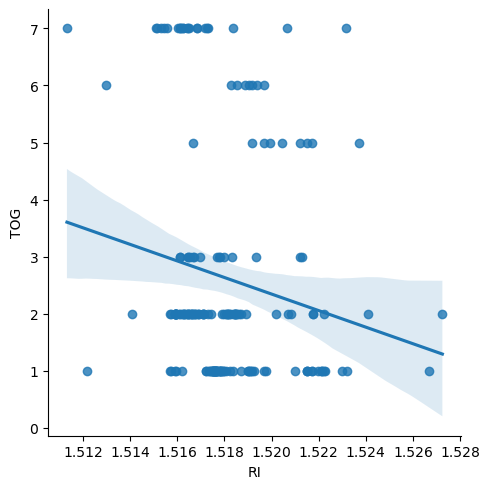

In [83]:
sns.lmplot(x='RI', y= 'TOG' , data=df_new,)

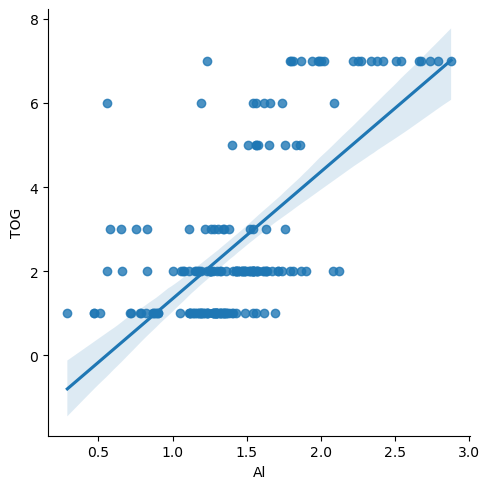

In [84]:
sns.lmplot(x='Al', y= 'TOG' , data=df_new,)

Putting this in model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [86]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu, "on Random_state",maxRS)

maximum r2 score is  0.9402162940765265 on Random_state 5


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=maxRS)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

In [89]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_LR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_LR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.953827514656839
R2_score on training data: 85.49256251540659
Mean Absolute Error :- 0.3371244223204189
Mean_Squared_Error :-  0.18974091479900654
Root Mean Square Error:- 0.4355926018644102


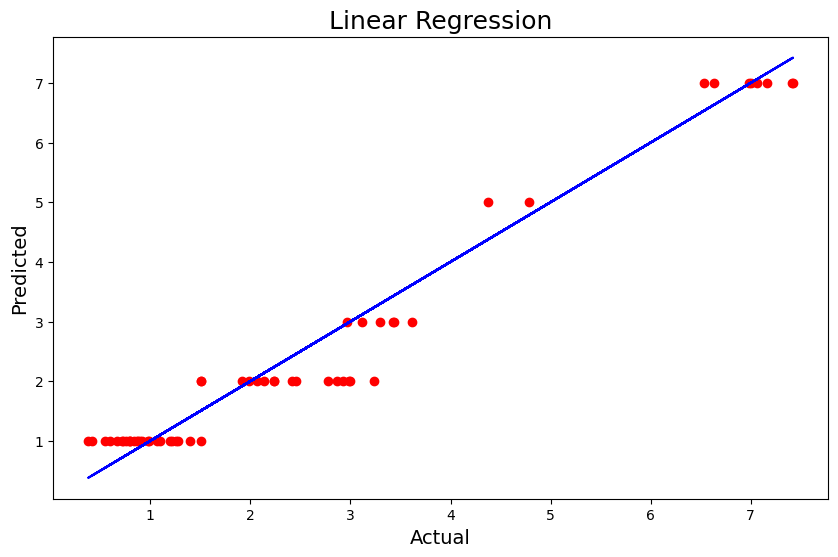

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [91]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_RFR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_RFR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9993895399305556
R2_score on training data: 99.91985846525355
Mean Absolute Error :- 0.011896551724137942
Mean_Squared_Error :-  0.002508620689655173
Root Mean Square Error:- 0.05008613270811765


In [92]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_GBR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_GBR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.999999999283291
R2_score on training data: 99.99999992944922
Mean Absolute Error :- 4.409938512636043e-05
Mean_Squared_Error :-  2.9452394012489355e-09
Root Mean Square Error:- 5.427005989723003e-05


In [93]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:', r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_lasso))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_lasso))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.5242738512938112
R2_score on training data: 49.18427190396862
Mean Absolute Error :- 1.100589005757598
Mean_Squared_Error :-  1.954945980890117
Root Mean Square Error:- 1.3981938280832586


In [94]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:', r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_rd))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_rd))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9544565014527889
R2_score on training data: 85.49031268442458
Mean Absolute Error :- 0.3335994999947133
Mean_Squared_Error :-  0.18715616049840858
Root Mean Square Error:- 0.4326154880473058


In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_dtr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_dtr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 1.0
R2_score on training data: 100.0
Mean Absolute Error :- 0.0
Mean_Squared_Error :-  0.0
Root Mean Square Error:- 0.0


In [96]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_svr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_svr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.9759762627700885
R2_score on training data: 92.62489380805842
Mean Absolute Error :- 0.2522018442089912
Mean_Squared_Error :-  0.098722991517924
Root Mean Square Error:- 0.31420215072135327


In [97]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_etr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_etr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.995679369212963
R2_score on training data: 100.0
Mean Absolute Error :- 0.05275862068965517
Mean_Squared_Error :-  0.01775517241379311
Root Mean Square Error:- 0.13324853625384825


In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_LR)- score.mean())*100)

[  0.          -0.53368582   0.          -1.5444004  -13.76626614]
-3.1688704705571147
Difference between R2 score and cross validation is :-  412.2697985213954


In [100]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_RFR)- score.mean())*100)

[ 1.         -0.51094667  1.         -3.06704876 -8.55464434]
-2.0265279545868613
Difference between R2 score and cross validation is :-  416.826001048767


In [101]:
score2=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_svr)- score.mean())*100)

[  0.          -0.28370922   0.           0.3375937  -28.79728606]
-5.748680315550588
Difference between R2 score and cross validation is :-  414.48467333272026


In [102]:
score3=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_etr)- score.mean())*100)

[ 0.         -0.16871444  0.         -0.5592604  -7.74265226]
-1.6941254205854974
Difference between R2 score and cross validation is :-  416.45498397700777


In [103]:
score4=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_dtr)- score.mean())*100)

[ 1.         -0.58888889  1.         -2.48019802 -3.29864253]
-0.8735458885255039
Difference between R2 score and cross validation is :-  416.8870470557115


In [104]:
score5=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_GBR)- score.mean())*100)

[ 0.         -0.58897166  0.         -2.23943911 -8.71630848]
-2.308943849611371
Difference between R2 score and cross validation is :-  416.8870469840406


In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param={'alpha' :[1.0,.05,.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state' : [1,4,10,20]
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})